# 6.5 Lab 1: Subset Selection Methods



<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#6.5.1-Best-Subset-Selection">Best Subset Selection</a></li>
        <li><a href="#6.5.2-Forward-and-Backward-Stepwise-Selection">Forward and Backward Stepwise Selection</a></li>
    </ol>
</div>


In this lab, we explore the resampling techniques covered in this chapter


## _6.5.1 Best Subset Selection_

Here we apply the best subset selection approach to the **Hitters** data. We wish to predict a baseball player’s Salary on the basis of various statistics associated with performance in the previous year.

> You can download **Hitters** data set for from **[here.](https://drive.google.com/file/d/1e2NqNJGkCTAGBee8JHGNGCJHplG5R2YQ/view?usp=sharing)**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
hitters = pd.read_csv('Hitters.csv')
hitters.shape

(322, 20)

In [3]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [5]:
hitters.Salary.isna().sum() # number of NaN valeus in Salary column

59

Hence we see that Salary is missing for 59 players. The `dropna()` function removes all of the rows that have missing values in any variable.

In [6]:
hitters = hitters.dropna(axis=0)
hitters.shape

(263, 20)

In [7]:
hitters.reset_index(inplace=True)
hitters.rename(columns={'index': 'Player'}, inplace=True)

In [8]:
hitters.columns

Index(['Player', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [40]:
X = hitters.loc[:, hitters.columns != 'Salary' AND hitters.columns != 'Player']
y = hitters['Salary']

In [41]:
print(X['League'].value_counts())
print()
print(X['Division'].value_counts())
print()
print(X['NewLeague'].value_counts())

A    139
N    124
Name: League, dtype: int64

W    134
E    129
Name: Division, dtype: int64

A    141
N    122
Name: NewLeague, dtype: int64


We convert categorical values into the dummy variables

In [42]:
print(X['League'].value_counts())
print()
print(X['Division'].value_counts())
print()
print(X['NewLeague'].value_counts())

A    139
N    124
Name: League, dtype: int64

W    134
E    129
Name: Division, dtype: int64

A    141
N    122
Name: NewLeague, dtype: int64


In [43]:
def get_index(df):
    col_index = {}
    column = df.columns
    for col in column:
        col_index[col] = df.columns.get_loc(col)
    return col_index

In [44]:
column_index = get_index(X)
print(column_index)

{'Player': 0, 'AtBat': 1, 'Hits': 2, 'HmRun': 3, 'Runs': 4, 'RBI': 5, 'Walks': 6, 'Years': 7, 'CAtBat': 8, 'CHits': 9, 'CHmRun': 10, 'CRuns': 11, 'CRBI': 12, 'CWalks': 13, 'League': 14, 'Division': 15, 'PutOuts': 16, 'Assists': 17, 'Errors': 18, 'NewLeague': 19}


In [45]:
def label_encoder(df, index):
    le = LabelEncoder()
    for c in index:
        df.iloc[:, c] = le.fit_transform(df.iloc[:, c])
    return df

In [63]:
X = label_encoder(X, [14, 15, 19]) # running previously defined function will turn categorical variables into dummies

X.drop(['Player'], axis=1, inplace=True)
X

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,1,0,325,9,3,1
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,0,0,313,381,20,0
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,0,1,37,113,7,0
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,0,0,1314,131,12,0


We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [64]:
X.shape

(263, 19)

In [82]:
def subset_selection(feature_set):
    # Fit model on feature_set and calculate RSS
    regr = sm.OLS(y,X[list(feature_set)]).fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [83]:
def best_model(k):
    
    tic = time.time()
    
    results = []
    
    # we use `Combinations` function from itertools library
    for c in itertools.combinations(X.columns, k):
        results.append(subset_selection(c))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

This returns a DataFrame containing the best model that we generated, along with number of predictors and time elepsed. Now we want to call that function for each number of predictors **𝑘**

In [84]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,7):
    models_best.loc[i] = best_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Processed 19 models on 1 predictors in 0.06399941444396973 seconds.
Processed 171 models on 2 predictors in 0.5039927959442139 seconds.
Processed 969 models on 3 predictors in 2.723961591720581 seconds.
Processed 3876 models on 4 predictors in 11.470335721969604 seconds.
Processed 11628 models on 5 predictors in 35.556621074676514 seconds.
Processed 27132 models on 6 predictors in 83.84164261817932 seconds.
Total elapsed time: 134.7715950012207 seconds.


Now we have one big DataFrame that contains the best models we've generated along with their RSS:

In [72]:
models_best

,RSS,model
1,4.321393e+07,<statsmodels.regression.linear_model.Regressio...
2,3.073305e+07,<statsmodels.regression.linear_model.Regressio...
3,2.941071e+07,<statsmodels.regression.linear_model.Regressio...
4,2.797678e+07,<statsmodels.regression.linear_model.Regressio...
5,2.718780e+07,<statsmodels.regression.linear_model.Regressio...
6,2.639772e+07,<statsmodels.regression.linear_model.Regressio...


We can also access each individual model:

In [73]:
print(models_best.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              193.0
Date:                Mon, 27 Apr 2020   Prob (F-statistic):                    5.32e-85
Time:                        21:44:20   Log-Likelihood:                         -1891.5
No. Observations:                 263   AIC:                                      3793.
Df Residuals:                     258   BIC:                                      3811.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This output indicates that the best two-variable model contains only **Hits** and **CRBI**. To save time, we only generated results up to the best 6-variable model. You can use the functions we defined above to explore as many variables as are desired. For example let's run the model with all 19 variables.

In [74]:
print(getBest(19)["model"].summary())

Processed 1 models on 19 predictors in 0.007999181747436523 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              54.64
Date:                Mon, 27 Apr 2020   Prob (F-statistic):                    1.31e-76
Time:                        21:44:57   Log-Likelihood:                         -1877.9
No. Observations:                 263   AIC:                                      3794.
Df Residuals:                     244   BIC:                                      3862.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


We can also access each individual parameter withaout calling the full summary function on the model. For example let's take a look at the $R^2$ value:

In [75]:
models_best.loc[5, "model"].rsquared

0.7890081164434608

In addition to the verbose output we get when we print the summary to the screen, fitting the **OLM** also produced many other useful statistics such as adjusted $R^2$, AIC, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$ across all our models:

In [80]:
# we can do this by itterating through our dataframe containing all the models
for i in range(1, len(models_best)+1):
    print(models_best.loc[i, "model"].rsquared)

0.6646367379036429
0.7614950002332872
0.7717570782136107
0.7828851498169958
0.7890081164434608
0.7951395186464754


As expected, the $R^2$ statistic increases monotonically as more variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will help us decide which model to select.

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.arr

Text(0, 0.5, 'BIC')

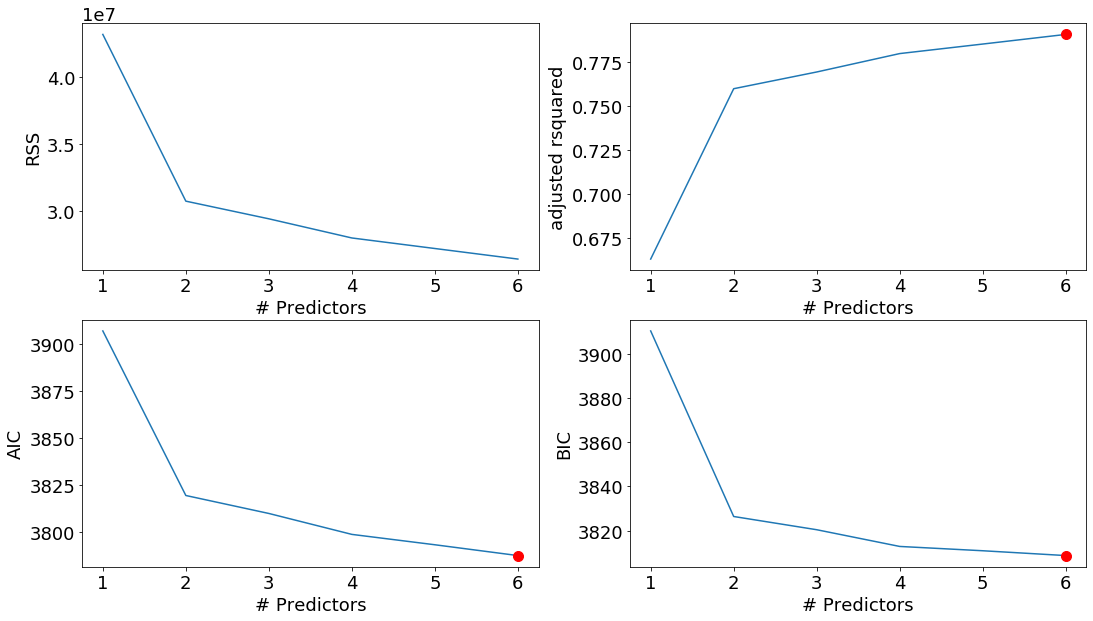

In [81]:
plt.figure(figsize=(18,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1) # Setting up a 2x2 grid

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to BIC, the best performer is the model with 6 variables. According to AIC and adjusted $R^2$ something a bit more complex might be better. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

---------
## _6.5.2 Forward and Backward Stepwise Selection_
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above: